In [5]:
# Video Game Sales Analysis

## Dataset: Video Game Sales with Ratings (Kaggle)

## 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()





,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#⃣# Inspect your data
# Check for missing values and data types:
df.info()
df.describe()
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
## 3. Clean the Data
# Convert Year_of_Release to numeric and drop rows with missing Year or Global_Sales.
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce')
df = df.dropna(subset=['Year_of_Release', 'Global_Sales'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16450 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16418 non-null  object 
 5   NA_Sales         16450 non-null  float64
 6   EU_Sales         16450 non-null  float64
 7   JP_Sales         16450 non-null  float64
 8   Other_Sales      16450 non-null  float64
 9   Global_Sales     16450 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       9840 non-null   object 
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


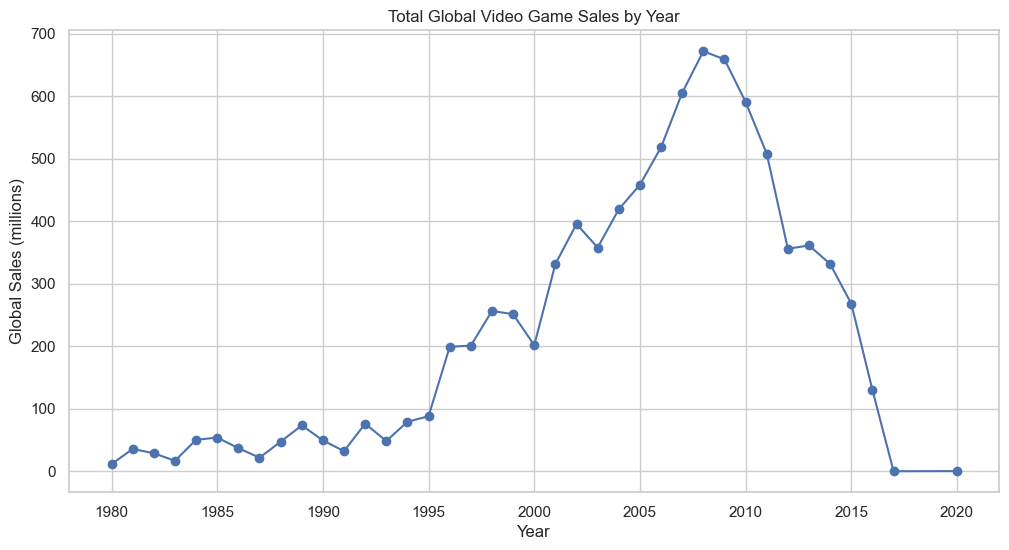

In [11]:
## 4. Total Global Sales by Year
# Visualize the trend of total video game sales over time.
import matplotlib.pyplot as plt

sales_by_year = df.groupby('Year_of_Release')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line', marker='o')
plt.title('Total Global Video Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.show()



Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Call of Duty: Black Ops II        29.40
Name: Global_Sales, dtype: float64


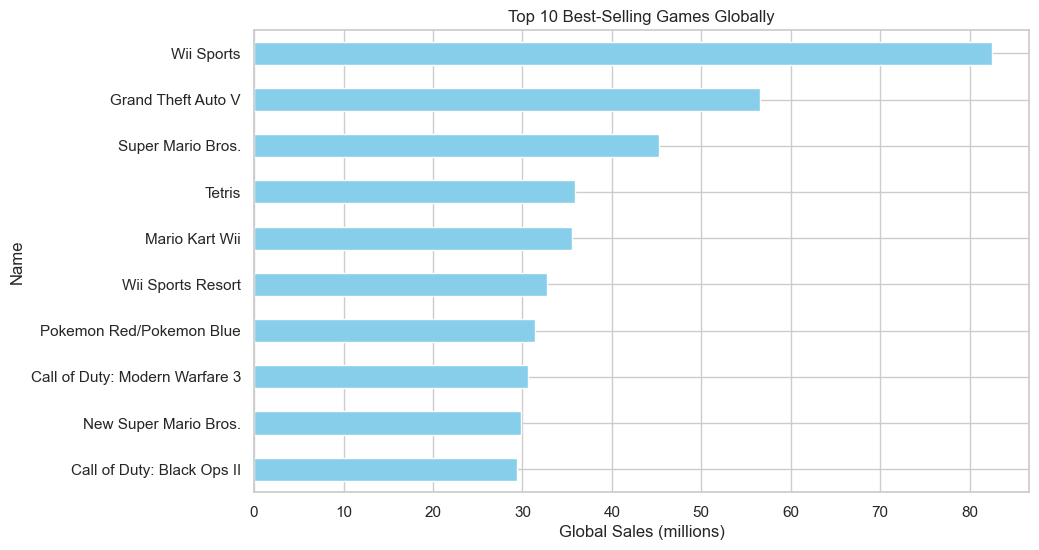

In [13]:
## 5. Top 10 Best-Selling Games
# Highlight the individual games with the highest total global sales.
top_games = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print(top_games)

top_games.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (millions)')
plt.gca().invert_yaxis()
plt.show()



NA_Sales       4343.47
EU_Sales       2400.21
JP_Sales       1290.73
Other_Sales     782.73
dtype: float64


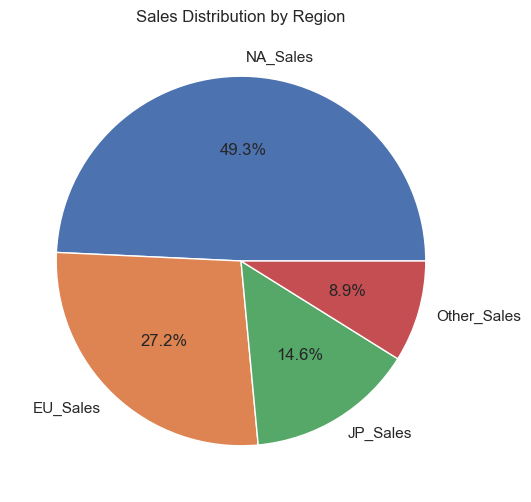

In [15]:
## 6. Sales by Region
# Compare the total sales by region as a pie chart.
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(region_sales)

region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Sales Distribution by Region')
plt.ylabel('')
plt.show()



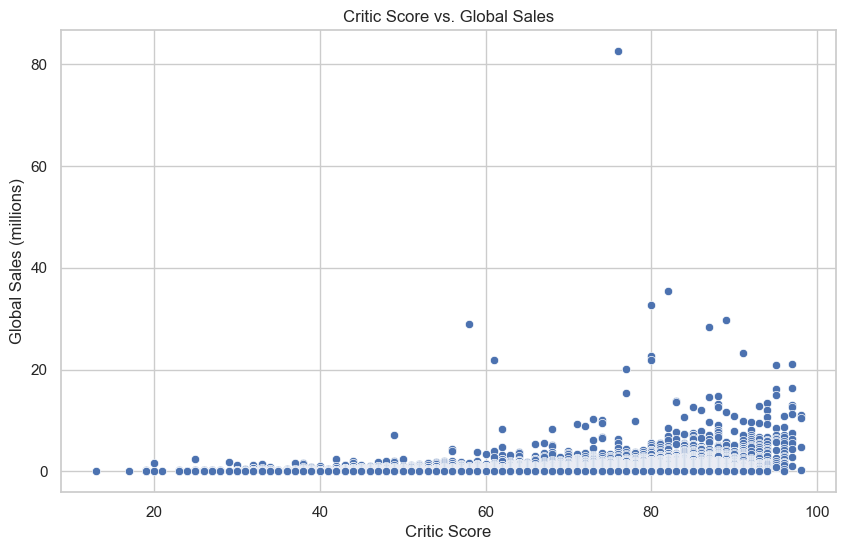

Correlation between Critic Score and Global Sales: 0.25


In [17]:
## 7. Critic Score vs. Global Sales
# Analyze the relationship between critic scores and total sales.
import seaborn as sns

# Remove rows with missing Critic_Score
df_clean = df.dropna(subset=['Critic_Score'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='Critic_Score', y='Global_Sales')
plt.title('Critic Score vs. Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.show()

# Correlation coefficient
corr = df_clean['Critic_Score'].corr(df_clean['Global_Sales'])
print(f"Correlation between Critic Score and Global Sales: {corr:.2f}")



In [ ]:
## 8. Conclusion

- Cleaned the dataset and handled missing values.
- Analyzed global sales trends by year.
- Identified the top 10 best-selling games.
- Compared sales by region with a pie chart.
- Explored the relationship between critic scores and global sales.

Overall, the data shows strong trends around 2005–2010 with a decline after that.
The correlation between critic scores and sales is modest, suggesting other factors also influence success.
